In [ ]:
%matplotlib inline

In [1]:
# ===============================
# Task 1: Exploratory Data Analysis (EDA)
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:\\Users\\Sindu\\Desktop\\Assignment ExcelR\\SVM\\SVM\\mushroom.csv")

print("First 5 rows:")
display(df.head())
print("\nDataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())


First 5 rows:


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245



Dataset shape: (2000, 26)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_r

C:\Users\Sindu\AppData\Local\Temp\ipykernel_18588\2158668910.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette="Set2")


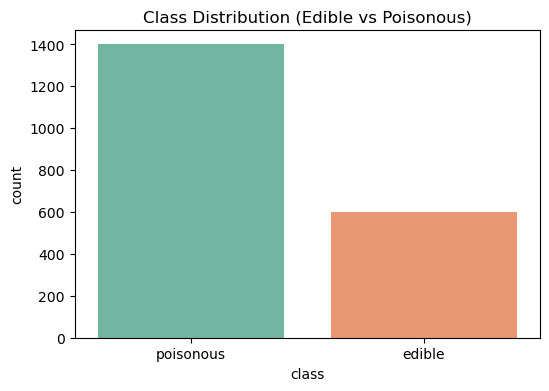

In [3]:
# Visualize target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette="Set2")
plt.title("Class Distribution (Edible vs Poisonous)")
plt.show()


In [5]:
# ===============================
# Task 2: Data Preprocessing
# ===============================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode target variable (class: edible=0, poisonous=1)
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

# Encode categorical variables
X = pd.get_dummies(df.drop('class', axis=1))
y = df['class']

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (1600, 127)
Testing set: (400, 127)


Categorical: ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']
Numeric: ['Unnamed: 0', 'stalk_height', 'cap_diameter']


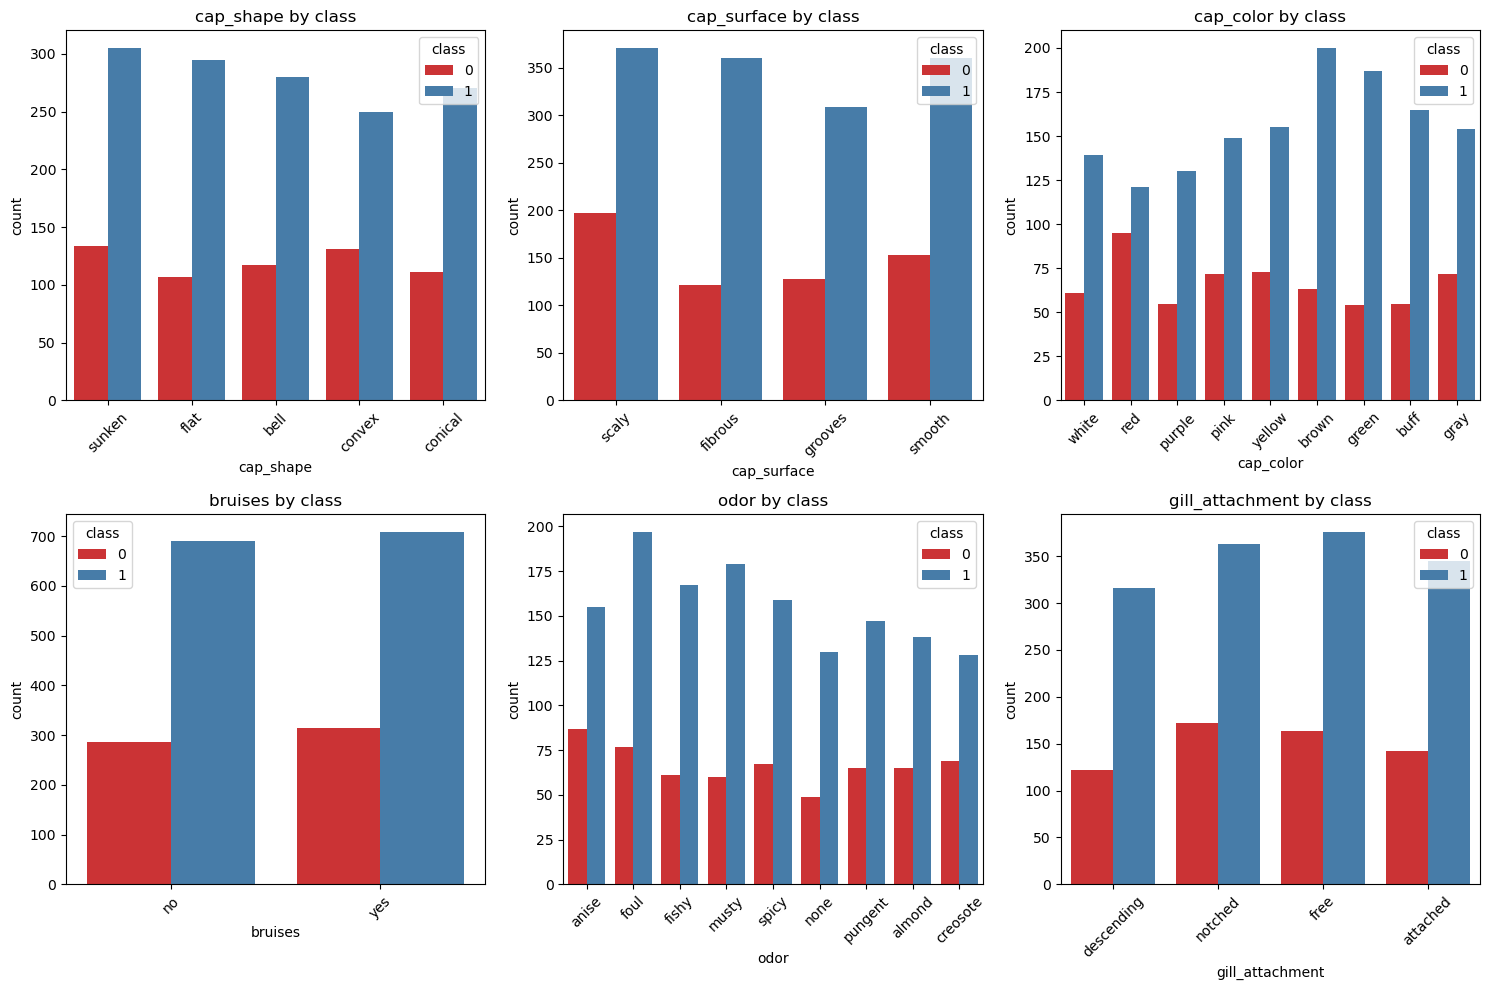

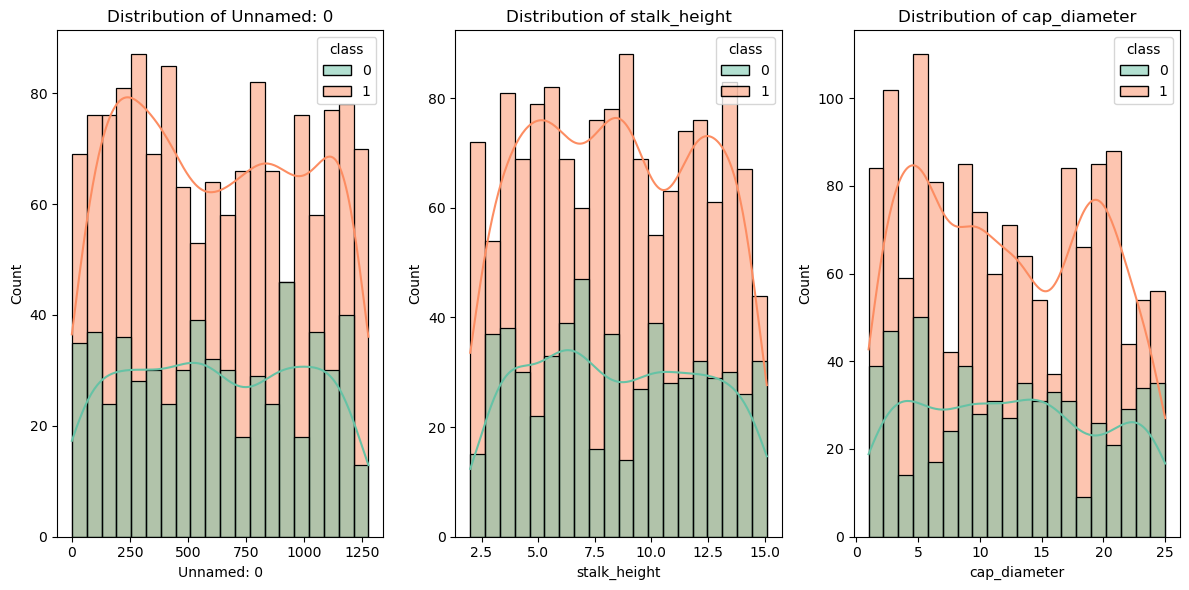

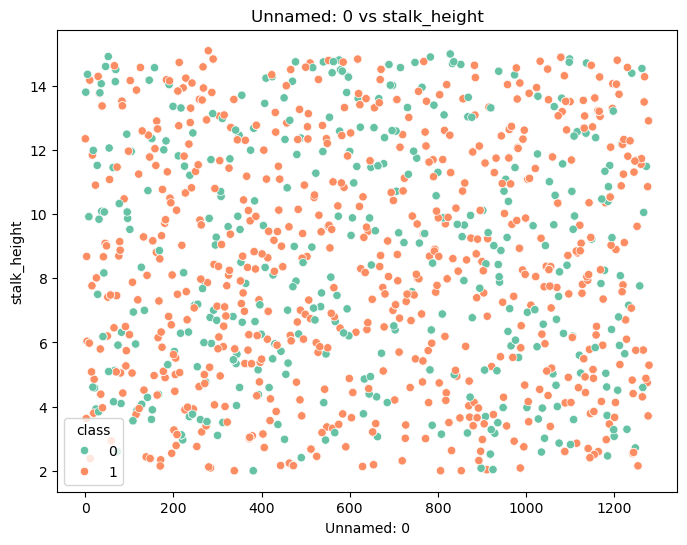

In [7]:
# ===============================
# Task 3: Data Visualization
# ===============================

# Separate categorical & numeric
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numeric_features = df.select_dtypes(include=['int64','float64']).columns.tolist()

print("Categorical:", categorical_features)
print("Numeric:", numeric_features)

# Countplots for first few categorical
plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_features[:6]):
    plt.subplot(2,3,i+1)
    sns.countplot(x=col, data=df, hue="class", palette="Set1")
    plt.title(f"{col} by class")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograms for numeric
plt.figure(figsize=(12,6))
for i, col in enumerate(numeric_features):
    plt.subplot(1,len(numeric_features),i+1)
    sns.histplot(data=df, x=col, hue="class", bins=20, kde=True, palette="Set2")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Scatter plot for numeric
if len(numeric_features) >= 2:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=numeric_features[0], y=numeric_features[1], hue="class", palette="Set2")
    plt.title(f"{numeric_features[0]} vs {numeric_features[1]}")
    plt.show()


In [13]:
# Task 4: SVM Implementation 

from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Dimensionality reduction with PCA (to speed up training)
pca = PCA(n_components=20, random_state=42)  # keep top 20 principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Training SVM with Linear kernel on PCA-reduced data...")
svm_clf = LinearSVC(random_state=42, max_iter=5000)
svm_clf.fit(X_train_pca, y_train)

# Predictions
y_pred = svm_clf.predict(X_test_pca)

# Evaluation
print("\n✅ Model Performance on Test Data:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Edible", "Poisonous"]))


Training SVM with Linear kernel on PCA-reduced data...

✅ Model Performance on Test Data:
Accuracy : 0.7
Precision: 0.7
Recall   : 1.0
F1-score : 0.8235294117647058

Detailed Classification Report:
              precision    recall  f1-score   support

      Edible       0.00      0.00      0.00       120
   Poisonous       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


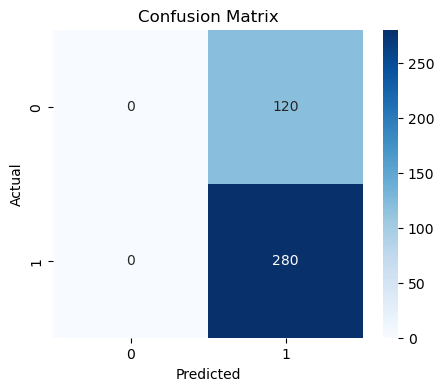

In [15]:
# ===============================
# Task 5: Visualization of Results
# ===============================

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [21]:
# Task 6: Hyperparameter Tuning

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

print("🔄 Starting manual tuning...")

# PCA for speed
pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define models with different kernels
models = {
    "Linear SVM": SVC(kernel="linear", C=1, max_iter=2000),
    "Polynomial SVM (deg=3)": SVC(kernel="poly", degree=3, C=1, max_iter=2000),
    "RBF SVM": SVC(kernel="rbf", C=1, gamma="scale", max_iter=2000)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🚀 Training {name} ...")
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    acc = accuracy_score(y_test, y_pred)
    print(f"✅ {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=["Edible", "Poisonous"]))


🔄 Starting manual tuning...

🚀 Training Linear SVM ...
✅ Linear SVM Accuracy: 0.4800
              precision    recall  f1-score   support

      Edible       0.28      0.48      0.36       120
   Poisonous       0.68      0.48      0.56       280

    accuracy                           0.48       400
   macro avg       0.48      0.48      0.46       400
weighted avg       0.56      0.48      0.50       400


🚀 Training Polynomial SVM (deg=3) ...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


✅ Polynomial SVM (deg=3) Accuracy: 0.7000
              precision    recall  f1-score   support

      Edible       0.00      0.00      0.00       120
   Poisonous       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400


🚀 Training RBF SVM ...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ RBF SVM Accuracy: 0.7000
              precision    recall  f1-score   support

      Edible       0.00      0.00      0.00       120
   Poisonous       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


🔄 Training with kernel = linear ...
✅ linear kernel done. Accuracy = 0.5150
🔄 Training with kernel = poly ...
✅ poly kernel done. Accuracy = 0.7000
🔄 Training with kernel = rbf ...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


✅ rbf kernel done. Accuracy = 0.7000


C:\Users\Sindu\AppData\Local\Temp\ipykernel_18588\3264218698.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Set2")


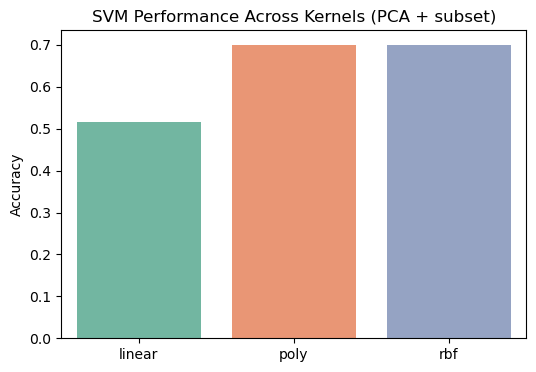


📊 Kernel comparison results: {'linear': 0.515, 'poly': 0.7, 'rbf': 0.7}


In [25]:
# ===============================
# Task 7: Comparison & Analysis (FAST Version)
# ===============================

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce dimensions to 2 for speed
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Take only a subset to avoid long training
X_train_small = X_train_pca[:2000]
y_train_small = y_train[:2000]
X_test_small = X_test_pca[:500]
y_test_small = y_test[:500]

kernels = ['linear', 'poly', 'rbf']
results = {}

for k in kernels:
    print(f"🔄 Training with kernel = {k} ...")
    model = SVC(kernel=k, random_state=42, max_iter=1000)  # limit iterations
    model.fit(X_train_small, y_train_small)
    acc = accuracy_score(y_test_small, model.predict(X_test_small))
    results[k] = acc
    print(f"✅ {k} kernel done. Accuracy = {acc:.4f}")

# Plot comparison
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Set2")
plt.title("SVM Performance Across Kernels (PCA + subset)")
plt.ylabel("Accuracy")
plt.show()

print("\n📊 Kernel comparison results:", results)
